(content:chapter:equivalentcircuits)=

# Equivalent Circuits

```{include} includes/latex_imports.md
```

In [1]:
import schemdraw.elements as elm
import schemdraw
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


For instance, we may know nothing about the analog input circuit of the microcontroller pictured below on the left. We know we can connect the ground pin to a circuit we want to connect to and the analog input to another node in that circuit at which we want to measure the voltage. Let's use the voltage divider pictured below on the right. Ideally, connecting the output of the voltage divider to the input of the microcontroller will not affect the voltage labeled $V_\text{OUT}$. We would like it to be 6~\text{V} as would be the case if nothing is connected to the voltage divider. Realistically, $V_\text{OUT}$ will be affected, but by how much?

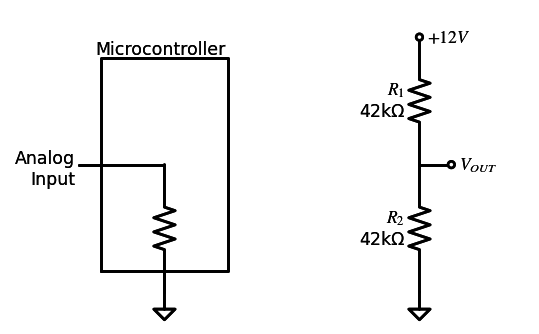

In [2]:
with schemdraw.Drawing(file='thevenin-intro.svg') as d:
    d+= (uC := elm.Ic(pins=[elm.IcPin(anchorname='GND', side='bottom'),
                 elm.IcPin(anchorname='A0', side='left',pos=1)],
            edgepadW = 1.5,  # Make it a bit wider
            edgepadH = 2.5,  # Make it a bit wider
            lblsize=12,
            pinspacing=1))
    d += (GndSig := elm.GroundSignal().at(uC.GND))    
    d += (Rin := elm.Resistor().at(uC.GND).up())    
    d += (LineT := elm.Line().left().tox(uC.A0))    
    d += (Lbl1 := elm.Label().at(uC.A0).label('Analog\nInput',loc='left'))    
    d += (Lbl2 := elm.Label().at((1.5,5.1)).label('Microcontroller',loc='top'))    

    d.move_from(uC.GND, dx=6, dy=6)
    d += elm.Dot(open=True).label('$+12V$',loc='right')
    d += (R1 := elm.Resistor().down().label('$R_{1}$\n42kΩ', loc='top'))
    d += (R2 := elm.Resistor().down().label('$R_{2}$\n42kΩ', loc='top'))    
    d += (GndSig := elm.GroundSignal())    
    d += (LineOut := elm.Line().at(R1.end).right().length(d.unit/4))    
    d += elm.Dot(open=True).label('$V_{OUT}$',loc='right')

```{figure} thevenin-intro.svg
---
height: 300px
name: thevenin-intro
---
```

The two theorems that will help us answer this question, Thevenin's and Norton's theorems, are detailed in this chapter. I'll revisit this example as I introduce Thevenin's theorem in the next section.

## Thevenin's Theorem

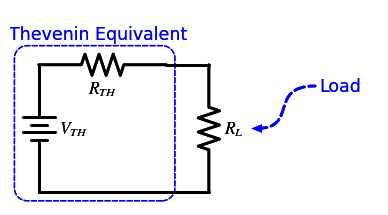

In [3]:
with schemdraw.Drawing(file='thevenin-canonical.svg') as d:
    d += (Vth := elm.Battery().up().label('$V_{TH}$', loc='bottom').reverse())
    d += (Rth := elm.Resistor().right().label('$R_{TH}$', loc='bottom'))    
    d += (LineT := elm.Line().right().length(1))    
    d += (Rl := elm.Resistor().down().label('$R_{L}$', loc='bottom'))    
    d += (LineB := elm.Line().left().tox(Vth.start))    
    d += (thevenin := elm.EncircleBox([Vth, Rth],includelabels=False).linestyle('--').linewidth(1).color('blue'))
    d += (Lbl1 := elm.Label().at((1.5,3.6)).label('Thevenin Equivalent',loc='top').color('blue'))
    d += (G1 := elm.Gap().at(Rl.center).right().length(0.5))            
    d += elm.Annotate(th1=0).at(G1.end).delta(dx=1.5, dy=1).label('Load').color('blue').linestyle('--')

```{figure} thevenin-canonical.svg
---
height: 300px
name: thevenin-canonical
---
```

### Thevenin Voltage

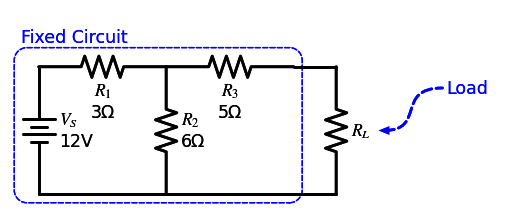

In [4]:
with schemdraw.Drawing(file='thevenin-toy.svg') as d:
    d += (Vs := elm.Battery().up().label('$V_{S}$\n12V', loc='bottom').reverse())
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n3Ω', loc='bottom'))    
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n5Ω', loc='bottom'))    
    d += (LineT := elm.Line().right().length(1))    
    d += (Rl := elm.Resistor().down().label('$R_{L}$', loc='bottom'))    
    d += (LineB := elm.Line().left().tox(Vs.start))    

    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n6Ω', loc='bottom'))    
   
    d += (thevenin := elm.EncircleBox([Vs,R1,R2,R3],includelabels=False).linestyle('--').linewidth(1).color('blue'))
    d += (Lbl1 := elm.Label().at((2,3.8)).label('Fixed Circuit',loc='top').color('blue'))
    d += (G1 := elm.Gap().at(Rl.center).right().length(0.5))            
    d += elm.Annotate(th1=0).at(G1.end).delta(dx=1.5, dy=1).label('Load').color('blue').linestyle('--')

```{figure} thevenin-toy.svg
---
height: 300px
name: thevenin-toy
---
```

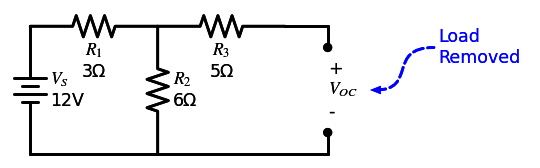

In [5]:
with schemdraw.Drawing(file='thevenin-toy-load-removed.svg') as d:
    d += (Vs := elm.Battery().up().label('$V_{S}$\n12V', loc='bottom').reverse())
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n3Ω', loc='bottom'))    
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n5Ω', loc='bottom'))    
    d += (LineT := elm.Line().right().length(1))    
    d += elm.LineDot().down().length(d.unit/6)
    d += (Rl := elm.Gap().down().label(('+','$V_{OC}$','-'), loc='bottom').length(4*d.unit/6))    
    d += elm.LineDot().down().length(d.unit/6).reverse()
    d += (LineB := elm.Line().left().tox(Vs.start))    
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n6Ω', loc='bottom'))    
    d += (G1 := elm.Gap().at(Rl.center).right().length(0.5))            
    d += elm.Annotate(th1=0).at(G1.end).delta(dx=1.5, dy=1).label('Load\nRemoved').color('blue').linestyle('--')

```{figure} thevenin-toy-load-removed.svg
---
height: 300px
name: thevenin-toy-load-removed
---
```

### Thevenin Resistance: Three Methods

There are three methods to determine Thevenin resistance. All three will be demonstrated on the toy problem in this section but each has strengths and weaknesses. Careful attention should be paid to the limitations of each method.

```{admonition} **Method~\#1~Equivalent Resistance:**

<u>**Limitations:**</u>~ Circuit cannot have any **dependent** supplies.

- Remove the load if it is not already removed.
- Replace all supplies (they should all be independent) with their ideal resistances.
- Find the equivalent resistance between the nodes where the load will be reconnected. That resistance is $R_{TH}$.
```

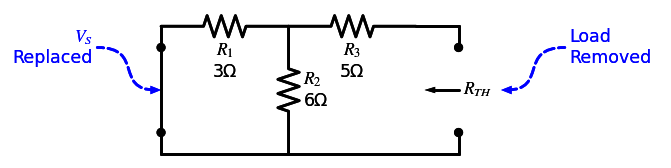

In [6]:
with schemdraw.Drawing(file='thevenin-toy-Rth-method-1.svg') as d:
    d += elm.LineDot().up().length(d.unit/6)
    d += (Vs := elm.Line().up().length(4*d.unit/6))    
    d += elm.LineDot().up().length(d.unit/6).reverse()
    
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n3Ω', loc='bottom'))    
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n5Ω', loc='bottom'))    
    d += (LineT := elm.Line().right().length(1))    
    d += elm.LineDot().down().length(d.unit/6)
    d += (Rl := elm.Gap().down().length(4*d.unit/6))    
    d += elm.LineDot().down().length(d.unit/6).reverse()
    d += (LineB := elm.Line().left().tox(Vs.start))    
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n6Ω', loc='bottom'))    
    d += (G1 := elm.Gap().at(Rl.center).right().length(0.5))            
    d += elm.Annotate(th1=0).at(G1.end).delta(dx=1.5, dy=1).label('Load\nRemoved').color('blue').linestyle('--')
    d += elm.Annotate(th1=0).at(Vs.center).delta(dx=-1.5, dy=1).label('$V_S$\nReplaced').color('blue').linestyle('--')
    
    d += (LineRth := elm.Line(arrow='->').at((7,1.5)).left().label('$R_{TH}$',loc='right').length(0.8))    

```{figure} thevenin-toy-Rth-method-1.svg
---
height: 300px
name: thevenin-toy-Rth-method-1
---
```

$$ R_{TH}=(R_1||R_2)+R_3=7~\Omega $$

```{admonition} **Method~\#2~Open Circuit Voltage/Short Circuit Current:**

<u>**Limitations:**</u>~Circuit must have one or more **independent** supplies.

- Remove the load if it is not already removed.
- Find the open circuit voltage ($V_{OC}$) between the nodes where the load will be reconnected.
- Place a short between the nodes where the load will be reconnected.
- Find the short circuit current ($I_{SC}$) through that short.
- $R_{TH}$ is then $\frac{V_{OC}}{I_{SC}}$
```

$V_{OC}$ was calculated in a previous section as 8~\text{V}. The load is then replaced with a short and the short-circuit current is calculated/measured.

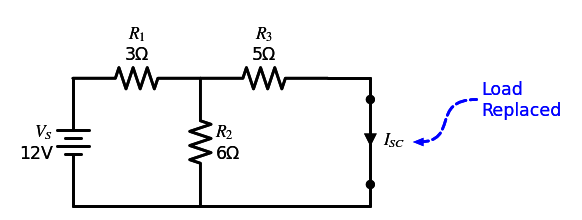

In [7]:
with schemdraw.Drawing(file='thevenin-toy-Rth-method-2.svg') as d:
    d += (Vs := elm.Battery().up().label('$V_{S}$\n12V', loc='top').reverse())
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n3Ω', loc='top'))    
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n5Ω', loc='top'))    
    d += (LineT := elm.Line().right().length(1))    
    d += elm.LineDot().down().length(d.unit/6)
    d += (Rl := elm.Line().down().length(4*d.unit/6))    
    d += elm.LineDot().down().length(d.unit/6).reverse()
    d += (LineB := elm.Line().left().tox(Vs.start))    
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n6Ω', loc='bottom'))    
    d += (G1 := elm.Gap().at(Rl.center).right().length(0.5))            
    d += elm.Annotate(th1=0).at(G1.end).delta(dx=1.5, dy=1).label('Load\nReplaced').color('blue').linestyle('--')
    d += elm.CurrentLabelInline(direction='in', ofst=-0.1).at(Rl).label('$I_{SC}$',loc='bottom')    

```{figure} thevenin-toy-Rth-method-2.svg
---
height: 300px
name: thevenin-toy-Rth-method-2
---
```

Use any method of analysis that you are confident in. I used mesh here:

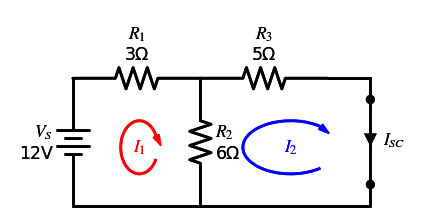

In [8]:
with schemdraw.Drawing(file='thevenin-toy-Rth-method-2-mesh.svg') as d:
    d += (Vs := elm.Battery().up().label('$V_{S}$\n12V', loc='top').reverse())
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n3Ω', loc='top'))    
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n5Ω', loc='top'))    
    d += (LineT := elm.Line().right().length(1))    
    d += elm.LineDot().down().length(d.unit/6)
    d += (Rl := elm.Line().down().length(4*d.unit/6))    
    d += elm.LineDot().down().length(d.unit/6).reverse()
    d += (LineB := elm.Line().left().tox(Vs.start))    
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n6Ω', loc='bottom'))    
    d += (G1 := elm.Gap().at(Rl.center).right().length(0.5))            
    d += elm.CurrentLabelInline(direction='in', ofst=-0.1).at(Rl).label('$I_{SC}$',loc='bottom')    
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=0.75).label('$I_1$').color('red')
    d += elm.LoopCurrent([R3,Rl,LineB,R2],pad=0.75).label('$I_2$').color('blue')
    

```{figure} thevenin-toy-Rth-method-2-mesh.svg
---
height: 300px
name: thevenin-toy-Rth-method-2-mesh
---
```

$$
\left[ \begin{array}{cc}
9\Omega&-6\Omega\\
-6\Omega&11\Omega\\
\end{array} \right]^{-1}\left[\begin{array}{c}12V\\0V\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}2.095~\text{A}\\1.143~\text{A}\end{array}\right]
$$

and $I_{SC}$=$I_2$ in this case leading to
$$ R_{TH}=\frac{V_{OC}}{I_{SC}}=\frac{8~\text{V}}{1.143~\text{A}}=7~\Omega $$

First, note that this result is the same as the value calculated with the previous method. Second, note that the units of the formula above follow Ohm's Law.

```{admonition} **Method~\#3~Apply a Voltage Source:**
<u>**Limitations:**</u>~None

- Remove the load if it is not already removed.
- Replace all **independent** supplies with their ideal resistances.
- Place a voltage supply ($V_{NEW}$) between the nodes where the load will be reconnected. You get to pick a voltage for this supply. Any number will do.
- Calculate the current ($I_{NEW}$) through this new supply.
- $R_{TH}$ is then $\frac{V_{NEW}}{I_{NEW}}$
```

Let's try it. I picked 42~\text{V} for the voltage source.

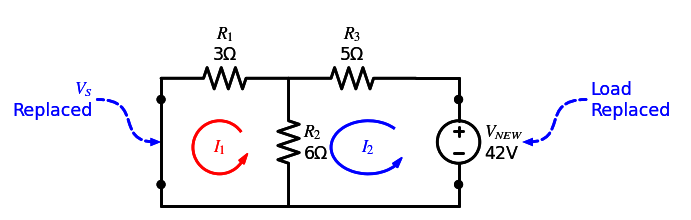

In [9]:
with schemdraw.Drawing(file='thevenin-toy-Rth-method-3-mesh.svg') as d:
    d += elm.LineDot().up().length(d.unit/6)
    d += (Vs := elm.Line().up().length(4*d.unit/6))    
    d += elm.LineDot().up().length(d.unit/6).reverse()
    
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n3Ω', loc='top'))    
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n5Ω', loc='top'))    
    d += (LineT := elm.Line().right().length(1))    
    d += elm.LineDot().down().length(d.unit/6)
    d += (Rl := elm.SourceV().down().length(4*d.unit/6).label('$V_{NEW}$\n42V',loc='bottom').reverse())    
    d += elm.LineDot().down().length(d.unit/6).reverse()
    d += (LineB := elm.Line().left().tox(Vs.start))    
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n6Ω', loc='bottom'))    
    d += (G1 := elm.Gap().at(Rl.center).right().length(1.5))            
    d += elm.LoopCurrent([R1,R2,LineB,Vs],pad=0.75,direction='ccw').label('$I_1$').color('red')
    d += elm.LoopCurrent([R3,Rl,LineB,R2],pad=0.75,direction='ccw').label('$I_2$').color('blue')
    d += elm.Annotate(th1=0).at(G1.end).delta(dx=1.5, dy=1).label('Load\nReplaced').color('blue').linestyle('--')
    d += elm.Annotate(th1=0).at(Vs.center).delta(dx=-1.5, dy=1).label('$V_S$\nReplaced').color('blue').linestyle('--')
    

```{figure} thevenin-toy-Rth-method-3-mesh.svg
---
height: 300px
name: thevenin-toy-Rth-method-3-mesh
---
```

Again, I chose mesh to find the current through the new supply. You don't need to use mesh. Use a method that you are comfortable with.

$$
\left[ \begin{array}{cc}
9\Omega&-6\Omega\\
-6\Omega&11\Omega\\
\end{array} \right]^{-1}\left[\begin{array}{c}0~\text{V}\\42~\text{V}\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}4~\text{A}\\6~\text{A}\end{array}\right]
$$

and $I_{NEW}$=$I_2$ in this case leading to
$$ R_{TH}=\frac{V_{NEW}}{I_{NEW}}=\frac{42~\text{V}}{6~\text{A}}=7~\Omega $$

All three methods are applicable to this example and all three yield the same result for $R_{TH}$. Some problems may not allow the application of all three methods according to their limitations however, if multiple methods are applicable the results will be equivalent.

Some examples will allow us to consider each of the three cases and their limitations.

````{admonition} Example
 
Find the Thevenin equivalent for the circuit shown here around the resistor, $R_{L}$.

````

````{admonition} Example
 
Find the Thevenin equivalent for the circuit shown here between nodes A and B.

```{figure} logo.png
---
height: 300px
name: LABEL_9
---
```

\Solution
**Find $V_{OC}$**
In this case $V_{OC}$ is across the nodes A and B as labeled below. Mesh analysis was applied in this example to find the open circuit voltage though an method of analysis would suffice.

```{figure} logo.png
---
height: 300px
name: LABEL_10
---
```

The single KVL equation for this circuit is

$$ 12-4I+2I_x-6I=0 $$

where $I_{x}$ is equal to I. Substituting into the KVL and grouping like terms leads to

$$ 12-8I=0 $$

and solving for I gives

$$ I=1.5~\text{A} $$

Using the value of I we can find voltages for all of the passive components in the circuit. Note that the 3~\Om ~resistor has no current flowing through it and therefore the voltage across it is 0~\text{V}.

```{figure} logo.png
---
height: 300px
name: LABEL_11
---
```

We can now write a KVL around the right side of the circuit including the drop across $V_{OC}$

$$ 9-0-V_{OC}=0 $$

and solve for $V_{OC}$

$$ V_{OC}=9~\text{V} $$

**Find $R_{TH}$**

The dependent supply prevents us from applying the equivalent resistance method (method \#1 described above). Either of the other two methods will yield the correct result.

**Find $R_{TH}$ (Method \#2)**

Place a short between nodes A and B and find the short circuit current ($I_{SC}$) through that short. The circuit now has two meshes as shown below and $I_{SC}$ is equal to $I_2$ in magnitude and polarity.

```{figure} logo.png
---
height: 300px
name: LABEL_12
---
```

The two KVL equations for this circuit are developed here

$$ 12-4I_1+2I_x-6(I_1-I_2)=0 $$

where $I_{x}$ is

$$ I_x=I_1-I_2 $$

leading to

$$ 8I_1-4I_2=12 $$

The KVL for the second mesh is

$$ -6(I_2-I_1)-3I_2=0 $$

which becomes

$$ 6I_1-9I_2=0 $$

after distributing and grouping like-terms. Solving the system yields

$$
\left[ \begin{array}{cc}
8\Omega&-4\Omega\\
6\Omega&-9\Omega\\
\end{array} \right]^{-1}\left[\begin{array}{c}12~\text{V}\\0~\text{V}\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}2.25~\text{A}\\1.5~\text{A}\end{array}\right]
$$

and $I_{SC}$=$I_2$ in this case leading to
$$ R_{TH}=\frac{V_{OC}}{I_{SC}}=\frac{9~\text{V}}{1.5~\text{A}}=6~\Omega $$


**Find $R_{TH}$ (Method \#3)**

Place a voltage supply with a value of your choice ($V_{NEW}$) between nodes A and B and find the current ($I_{NEW}$) through that supply. The circuit now has two meshes as shown below and $I_{SC}$ is equal to $I_2$ in magnitude and polarity.

```{figure} logo.png
---
height: 300px
name: LABEL_13
---
```

The two KVL equations for this circuit are developed here

$$ 12-4I_1+2I_x-6(I_1-I_2)=0 $$

where $I_{x}$ is

$$ I_x=I_1-I_2 $$

leading to

$$ 8I_1-4I_2=12 $$

The KVL for the second mesh is

$$ -6(I_2-I_1)-3I_2-V_{NEW}=0 $$

which becomes

$$ 6I_1-9I_2=V_{NEW} $$

Choosing a value of 20~\text{V} for $V_{NEW}$

$$ 6I_1-9I_2=20~\text{V} $$

after distributing and grouping like-terms. Solving the system yields

$$
\left[ \begin{array}{cc}
8\Omega&-4\Omega\\
6\Omega&-9\Omega\\
\end{array} \right]^{-1}\left[\begin{array}{c}0~\text{V}\\20~\text{V}\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-1.67~\text{A}\\-3.33~\text{A}\end{array}\right]
$$

and $I_{NEW}$=-$I_2$ in this case leading to
$$ R_{TH}=\frac{V_{NEW}}{I_{NEW}}=\frac{20~\text{V}}{3.33~\text{A}}=6~\Omega $$

The Thevenin equivalent circuit can be drawn using the values found above

```{figure} logo.png
---
height: 300px
name: LABEL_14
---
```

A load connected to the original circuit between nodes A and B will see the same voltage, current, and power as a load connected across the output of the Thevenin equivalent.

````

````{admonition} Example
 
Find the Thevenin equivalent for the circuit shown here between nodes A and B.

```{figure} logo.png
---
height: 300px
name: LABEL_15
---
```

This circuit has no independent supplies leading us to apply a voltage source where the load will be connected (method \#3 described above). The other two methods will not work according to their limitations.


````

We often use Thevenin equivalent circuits to characterize sub-circuits without having to know the details of each sub-circuit. In this way we can determine what is happening at the nodes where the sub-circuits connect together. Examples of sub-circuits include stages of amplifiers, sections of a power distribution layout, sensors, and microcontrollers.

````{admonition} Example
 

```{figure} logo.png
---
height: 300px
name: LABEL_16
---
```

**Analyzing the whole circuit**

$$
\left[ \begin{array}{cccc}
-1&1&0&0\\
0&0&-1&1\\
10&27&-9&0\\
0&-9&9&18
\end{array} \right]^{-1}\left[\begin{array}{c}2.2~\text{A}\\2.5~\text{A}\\-32~\text{V}\\-36~\text{V}\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\\I_4\end{array}\right]=\left[\begin{array}{c}-3.288~\text{A}\\-1.088~\text{A}\\-3.363~\text{A}\\-862.7~\text{mA}\end{array}\right]
$$

$$ I_O=I_2=-1.088~\text{A} $$

$$ V_O=9*(I_2-I_3)=9*(-1.088+3.363)=20.47~\text{V} $$

**Find the equivalent for the blue circuit**

```{figure} logo.png
---
height: 300px
name: LABEL_17
---
```

**Find the equivalent for the red circuit**

```{figure} logo.png
---
height: 300px
name: LABEL_18
---
```

**Working with the equivalent circuits**

```{figure} logo.png
---
height: 300px
name: LABEL_19
---
```


````

## Norton's Theorem

```{figure} logo.png
---
height: 300px
name: LABEL_20
---
```

```{figure} logo.png
---
height: 300px
name: LABEL_21
---
```

```{figure} logo.png
---
height: 300px
name: LABEL_22
---
```

## Maximum Power Transfer

Often we must ensure that the power delivered to a load is as much as possible. This is true when:

- Stereo to speaker connection
- Power transmission
- Data transmission
- and many more...

The circuit transmitting can be thought of as its Thevenin equivalent with a load connected as shown here

```{figure} logo.png
---
height: 300px
name: LABEL_23
---
```

We want to select the value of $R_{L}$ in order to maximize the power dissipate by that same resistor, $P_{RL}$. In order to find the relationship between the power and the value. This relationship can be stated mathematically using the function $P_{RL}(R_L)$. Don't confuse this notation with multiplication. One variable is a function of the other. Before we develop this function, let's play some mind games and look at some common answers that I get from students.

Use your intuition and guess what value of $R_{L}$ maximizes $P_{RL}$. When I ask for responses in class I usually get one of two answers. First, students will guess $R_{L}$ is 0~\Om (a short) reasoning that value will cause the maximum current to flow. While the current will be maximized, the voltage across a short is 0~\text{V}. Therefore, the power dissipated by the shorted load will be 0~\text{W}.

Second, a student will usually guess that $R_{L}$ is infinite (an open) reasoning that if 0~\text{V} gives us 0~\text{W} we should maximize voltage across the load. This, of course, causes the current to drop to 0~\text{A}. Once again this results in the load resistor dissipating 0~\text{W}. So the extreme limits of the load resistance won't dissipate any power. The answer lies somewhere in between those extremes. But where? Let's do some calculus.

We start by developing the function (relationship) between the load resistance and the power that load resistance dissipates. We start with the definition of power

$$ P_{RL}=V_{RL}I_{RL} $$

where the load voltage as pictured in the circuit above can be written with a simple voltage divider

$$ V_{RL}=V_{TH}\left[\frac{R_L}{R_{TH}+R_L}\right] $$

and the load current is an application of equivalent resistances and Ohm's law.

$$ I_{RL}=\frac{V_{TH}}{R_{TH}+R_L} $$

We can rewrite the load power by substituting the previous two expressions into the first.

$$ P_{RL}=V_{TH}\left[\frac{R_L}{R_{TH}+R_L}\right]\frac{V_{TH}}{R_{TH}+R_L} $$

or in a reduced form

$$ P_{RL}=\frac{V_{TH}^2R_L}{(R_{TH}+R_L)^2} $$

We can calculate the load power for a given load resistance. Alternatively, to find the maximum power we can set its derivative equal to zero and solve for $R_{L}$. The derivative with respect to $R_{L}$ is

$$ \frac{dP_{RL}}{dR_L}=\frac{V_{TH}^2(R_{TH}-R_L)}{(R_{TH}+R_L)^3} $$

The derivative will be 0 when the numerator is 0 leading to

$$ V_{TH}^2(R_{TH}-R_L)=0 $$

where $V_{TH}$ and $R_{TH}$ are fixed values so we solve for $R_{L}$. The only value of $R_{L}$ that makes this equation true is

$$ R_L=R_{TH} $$

This is it. This is the condition that guarantees the maximum power will be dissipated by/delivered to the load. Let's consider two applications of this theorem.

````{admonition} Example
 
Let's take a look at an example with values that supports the theory introduced above. Consider a circuit that has a Thevenin voltage of 10~\text{V} and a Thevenin resistance of 2~\Om. The equivalent circuit can be drawn with a load connected as shown here:

```{figure} logo.png
---
height: 300px
name: LABEL_24
---
```

We'll vary the value of $R_{L}$ along the horizontal of a plot to demonstrate how the other values of interest are affected.

```{figure} logo.png
---
height: 300px
name: LABEL_FOR_THIS_IMAGE
---
```

Now we can graphically look at the values of $R_{L}$ and see how they affect the power dissipated by the load, the green plot above. When $R_{L}$ is 0~\Om, the left extreme of the graph, we see the greatest amount of current flowing, 5~\text{A} for this circuit. However, at that same value of $R_{L}$ we see that $V_{RL}$ is 0~\text{V}. Thus the $P_{RL}$ is 0~\text{W} as shown by the green line in the plot above.

At the other extreme of the domain of $R_{L}$ we can consider, $R_{L}$ is $\infty~\Omega$. Since the paper is not wide enough we'll have to use 26~\Om ~as an approximation of infinity. Notice $P_{RL}$ is asymptotically approaching 0~\text{W} as $I_{RL}$ is asymptotically approaching 0~\text{A}.

The maximum power is dissipated when $R_{L}$=$R_{TH}$, 2~\Om~for this example. This is evident in the plot above as the green line reaches its maximum value of 12.5~\text{W} when $R_{L}$ is 2~\Om.


````

````{admonition} Example
 
Can $R_{L}$ dissipate 50~\text{W} in this circuit?

```{figure} logo.png
---
height: 300px
name: LABEL_25
---
```

To answer this we can redraw the circuit the circuit as its Thevenin equivalent. Thevenizing around $R_{L}$ give us a Thevenin voltage of 24~\text{V} and Thevenin resistance of 3~\Om. Take a moment to confirm these values. You're an expert now. You've read the first part of this chapter. The equivalent circuit looks like

```{figure} logo.png
---
height: 300px
name: LABEL_26
---
```

I've specified the value of $R_{L}$ that we know will result in the maximum power dissipated by that resistor, 3~\Om. In this case we can find $V_{RL}$ as

$$ V_{RL}=24~\text{V}\left[\frac{3~\Omega}{3~\Omega+3~\Omega}\right]=12~\text{V} $$

and therefore the maximum power that $R_{L}$ can dissipate will be

$$ P_{RL}=\frac{(12~\text{V})^2}{3~\Omega}=48~\text{W} $$

Any departure from $R_{L}$ being 3~\Om ~will lower the power dissipated by the load. Therefore, there is no value of $R_{L}$ that can dissipate 50~\text{W} in this circuit.

````

One final note. While the $R_{TH}$=$R_{L}$ condition guarantees maximum power transferred to the load it makes no guarantee about the efficiency. This misconception is common but misguided. When maximum power is dissipated by the load the efficiency will be 50\%. $R_{L}$ and $R_{TH}$ will dissipate the same power. The power dissipated by $R_{TH}$ is considered wasted energy dissipated by the transmitting circuit.

For now I'll leave this as an exercise for you. What value of $R_{L}$ gives maximum efficiency? What if we could vary $R_{TH}$? What value of $R_{TH}$ would lead to maximum efficiency?

## Source Conversions

Converting sources is a bit of an oddity that turns out to be useful. It is possible to solve for some circuit values in some circuits using this technique. However, not all circuits and values will yield to it. It is much more useful as a method of reducing the complexity of a circuit under analysis. Converting equivalent sources is useful to reduce the number of mesh currents or node voltages in a circuit.

### Norton Equivalent of a Thevenin Equivalent

To begin, we will find the Norton equivalent of a Thevenin equivalent circuit. The short circuit current is labeled in the schematic below.

```{figure} logo.png
---
height: 300px
name: LABEL_27
---
```

Calculating the short circuit current is a simple application of Ohm's law

$$ I_N=I_{SC}=\frac{V_{TH}}{R_{TH}} $$

Finding $R_{N}$ is similarly straight forward. The voltage supply is replaced by a short as shown here

```{figure} logo.png
---
height: 300px
name: LABEL_28
---
```

The relationship between $R_{N}$ and $R_{TH}$ is simple given there is only a single resistor to consider.

$$ R_N=R_{TH} $$

While the value is the same the location of the resistance is different in the two equivalent circuits. In series with the supply in the Thevenin equivalent and in parallel with the supply in the Norton equivalent.

### Thevenin Equivalent of a Norton Equivalent Now let's turn it around the other way. Starting with a Norton equivalent circuit let's find its Thevenin equivalent.

```{figure} logo.png
---
height: 300px
name: LABEL_29
---
```

Finding $V_{OC}$ is once again is a simple application of Ohm's Law.

$$ V_{TH}=V_{OC}=I_NR_N $$

Finding $R_{TH}$ is similarly straight forward. The current supply is replaced by an open as shown here

```{figure} logo.png
---
height: 300px
name: LABEL_30
---
```

The relationship between $R_{TH}$ and $R_{N}$ is again simple given there is only a single resistor to consider.

$$ R_{TH}=R_{N} $$

### Summary of Conversions

These conversion allow us to move quickly between Thevenin and Norton equivalents. In doing so the goal is to combine resistors and sources in such a way that reduces the complexity of the circuit. Let's keep the conversion shown below in our heads as we further develop this technique.

```{figure} logo.png
---
height: 300px
name: LABEL_31
---
```

```{figure} logo.png
---
height: 300px
name: LABEL_32
---
```

### Circuit Analysis and Reduction of Complexity with Source Conversions derp

````{admonition} Example
 

```{figure} logo.png
---
height: 300px
name: LABEL_33
---
```


````

````{admonition} Example
 

```{figure} logo.png
---
height: 300px
name: LABEL_34
---
```


````

````{admonition} Example
 

```{figure} logo.png
---
height: 300px
name: LABEL_35
---
```


````

Highlight reduction in complexity
Add Dependent supply example

### Strategy for Source Conversions